# This aim of this model is to build a model that can accurately detect emotion from text passes into it.

## Import relevant packages

In [1]:
# For loading our dataset into environment
import pandas as pd
# For text preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Due to historical good performmance, SVC and GaussianNB are used
from sklearn.naive_bayes import BernoulliNB
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle
import dill
import re
from gensim.utils import simple_preprocess

## Load the dataset into environment

In [2]:
raw_data = pd.read_csv("./Data/Tweets.csv")
raw_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
shape = raw_data.shape
print(f"This dataset contains {shape[0]} tweets")

This dataset contains 27481 tweets


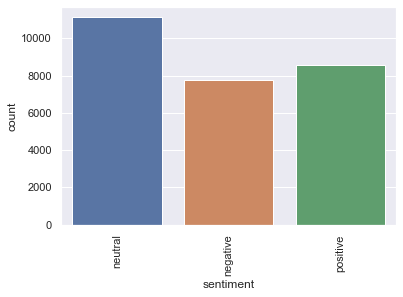

In [4]:
# Checking for class imbalance
# Usually in supervised machines learning(classification), class imbalance is a major problem where by there are more or a 
# specific class than the other
    
sns.countplot(data=raw_data, x='sentiment')
plt.xticks(rotation = 90)
plt.show()

## Data Cleaning and Preprocessing

### Cleaning

In [5]:
raw_data = raw_data.drop(raw_data[raw_data['sentiment'] == 'neutral'].index, axis = 0)

In [6]:
# Dropping irrelivant columns from the dataset
raw_data.drop(['textID', 'selected_text'], axis = 1, inplace = True)

In [7]:
raw_data.head(2)

,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative


In [8]:
# Observing the text column
print(raw_data.text[2])

my boss is bullying me...


In [9]:
# Removing mentions and URls(mu) from the dataset from the dataset
# Create a function to clean the text

def text_cleaner(texts):
    # removing url
    new_texts = [re.sub("http\S+", "", str(text)) for text in texts]
    # removing mentions
    new_texts = [re.sub("@\S+", "", text) for text in new_texts]
    # futher cleaning using gensim
    new_texts = [simple_preprocess(text, deacc=True) for text in new_texts]
    new_text_list = [' '.join(text) for text in new_texts]
    return new_text_list

In [10]:
# Original texts
for words in raw_data.text[:7]:
    print(words)

 Sooo SAD I will miss you here in San Diego!!!
my boss is bullying me...
 what interview! leave me alone
 Sons of ****, why couldn`t they put them on the releases we already bought
2am feedings for the baby are fun when he is all smiles and coos
 Journey!? Wow... u just became cooler.  hehe... (is that possible!?)
I really really like the song Love Story by Taylor Swift


In [11]:
# cleaned texts
new_listofwords = text_cleaner(raw_data.text)
for words in new_listofwords[:7]:
    print(words)

sooo sad will miss you here in san diego
my boss is bullying me
what interview leave me alone
sons of why couldn they put them on the releases we already bought
am feedings for the baby are fun when he is all smiles and coos
journey wow just became cooler hehe is that possible
really really like the song love story by taylor swift


In [12]:
# replacing the texts column in the dataframe with the cleaned one

raw_data['text'] = new_listofwords
raw_data.head(3)

,text,sentiment
1,sooo sad will miss you here in san diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative


In [13]:
raw_data.sentiment.unique()

array(['negative', 'positive'], dtype=object)

In [14]:
# Mapping the targets

raw_data.sentiment = raw_data.sentiment.map({
    'negative':0,
    'positive':1
})

In [15]:
raw_data.head(3)

,text,sentiment
1,sooo sad will miss you here in san diego,0
2,my boss is bullying me,0
3,what interview leave me alone,0


### word2vec

In [16]:
# Split the dataset into dependent and independent variables
X = raw_data.text.values
y = raw_data.sentiment.values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state = 10)

In [17]:
# Converting the words in integers
count_vec = CountVectorizer(lowercase=False, stop_words='english', max_features=3000)

X_train_count = count_vec.fit_transform(X_train)
X_test_count = count_vec.transform(X_test)

In [18]:
X_train_count = X_train_count.toarray()
X_test_count = X_test_count.toarray()

## Building the model with CountVec

In [19]:
model = BernoulliNB()

In [20]:
model.fit(X_train_count, y_train)

BernoulliNB()

### Model Evaluation

In [21]:
from sklearn.metrics import classification_report, accuracy_score

In [22]:
model.score(X_train_count, y_train)

0.9007333682556312

In [23]:
pred = model.predict(X_test_count)

In [24]:
cR = classification_report(y_pred=pred, y_true=y_test)
print(cR)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2334
           1       0.87      0.86      0.86      2575

    accuracy                           0.86      4909
   macro avg       0.85      0.86      0.85      4909
weighted avg       0.86      0.86      0.86      4909



In [25]:
aC = accuracy_score(y_pred=pred, y_true=y_test)
print(f"This model has an accuracy of {round(aC, 2) * 100}%")

This model has an accuracy of 86.0%


## Building the model with TFIDF

In [26]:
# Converting the words in integers
tfidf_vec = TfidfVectorizer(max_features=3000, stop_words='english')

X_train_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

In [27]:
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

In [28]:
# Model
model2 = BernoulliNB()

In [29]:
model2.fit(X_train_tfidf, y_train)

BernoulliNB()

### Evaluation

In [30]:
model2.score(X_train_tfidf, y_train)

0.9007333682556312

In [31]:
pred2 = model2.predict(X_test_tfidf)

In [32]:
cR2 = classification_report(y_pred=pred2, y_true=y_test)
print(cR2)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2334
           1       0.87      0.86      0.86      2575

    accuracy                           0.86      4909
   macro avg       0.85      0.86      0.85      4909
weighted avg       0.86      0.86      0.86      4909



In [33]:
aC2 = accuracy_score(y_pred=pred2, y_true=y_test)
print(f"This model has an accuracy of {round(aC2, 2) * 100}%")

This model has an accuracy of 86.0%


In [34]:
# This uses tfidf dictionary to convert word2vec
with open('./model&preprocessor/tfidf_dic.pkl', 'wb') as f:
    pickle.dump(tfidf_vec.vocabulary_, f)

In [35]:
# This is the classification model
with open('./model&preprocessor/text_classifier.pkl', 'wb') as f:
    pickle.dump(model2, f)